<a href="https://colab.research.google.com/github/VishalSingh1703/ML-Practice/blob/main/ANN_Classiying_Qwerties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-42-47e3bcc2019c>:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


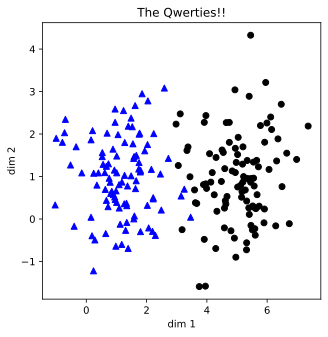

In [43]:
# create focii of the data
nPerClust = 100
blur = 1
A = [1, 1]
B = [5, 1]

# generate the data
a = [ A[0] + np.random.randn(nPerClust)*blur, A[1] + np.random.randn(nPerClust)*blur ]
b = [ B[0] + np.random.randn(nPerClust)*blur, B[1] + np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1))))

# concatenate into a matrix
data_np = np.hstack((a, b)).T

# conver to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize = (5, 5))
plt.plot(data[np.where(labels == 0)[0], 0], data[np.where(labels==0)[0], 1], 'b^')
plt.plot(data[np.where(labels == 1)[0], 0], data[np.where(labels==1)[0], 1], 'ko')
plt.title('The Qwerties!!')
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.show()

In [50]:
# build the model
ANNclassify = nn.Sequential(
    nn.Linear(2, 1),
    nn.ReLU(),
    nn.Linear(1, 1),
    nn.Sigmoid()
)

ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [51]:
# other model features
learningRate = .01

# loss function
lossfun = nn.BCELoss()

# optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(), lr = learningRate)

In [52]:
# train the model
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):

  # forward pass
  yHat = ANNclassify(data)

  # compute loss
  loss = lossfun(yHat, labels)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

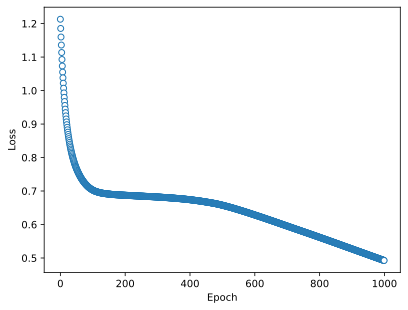

In [53]:
# losses

plt.plot(losses.detach(), 'o', markerfacecolor = 'w', linewidth = .1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [54]:
# compute the predictions
# manually compute lsoses
# finally forward pass
predictions = ANNclassify(data)

predlabels = predictions > 0.5

# find errors
misclassified = np.where(predlabels != labels)[0]

# total accuracy
totalacc = 100 - 100 * len(misclassified)/(2 * nPerClust)

print('Final Accuracy %g%%' %totalacc)

Final Accuracy 95%


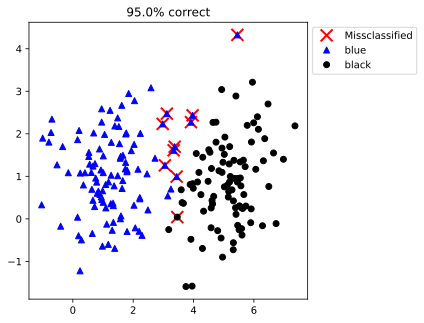

In [55]:
# plot the labeled data
fig = plt.figure(figsize = (5, 5))
plt.plot(data[misclassified, 0], data[misclassified, 1], 'rx', markersize = 12, markeredgewidth = 2)
plt.plot(data[np.where(~predlabels)[0],0], data[np.where(~predlabels)[0], 1], 'b^')
plt.plot(data[np.where(predlabels)[0],0], data[np.where(predlabels)[0], 1], 'ko')

plt.legend(['Missclassified', 'blue', 'black'], bbox_to_anchor = (1, 1))
plt.title(f'{totalacc}% correct')
plt.show()